## MLR for filling gaps in GWL data


Fill the gaps in groundwater levels with a multiple linear regression considering the closest wells until a defined distance

In [84]:
from functions import *
import warnings
%matplotlib notebook
warnings.filterwarnings('ignore')

In [137]:
#Load groundwater data as a dataframe with the well ids and the time series information
rpath="D:/Erasmus/Thesis/SomeData/" #Root path
gwdata=pd.read_pickle(rpath+"/Pickle/gwdata.pkl")
#Load groundwater observations filtered by gap length (6 months)
gwsel=pd.read_pickle(rpath+"/Pickle/gwsel.pkl") 

#load shapefile of stations
gws=gpd.read_file(rpath+"SHP/GWL_CDID.shp")

In [39]:
gwt=gwsel.copy()

In [162]:
gwt.sort_values(by="max_gap")

,wellid,data,count,gaps,max_gap,max_gap_months
465,200002154,MEST_ID JAHR MONAT DATUM HJAHR ...,1,"482 59 days Name: DATUM, dtype: timedelta64[ns]",59.0,1.966667
636,400050212,MEST_ID JAHR MONAT DATUM HJAHR ...,1,"674 59 days Name: DATUM, dtype: timedelta64[ns]",59.0,1.966667
92,400061210,MEST_ID JAHR MONAT DATUM HJAHR ...,1,"674 59 days Name: DATUM, dtype: timedelta64[ns]",59.0,1.966667
700,400080201,MEST_ID JAHR MONAT DATUM HJAHR ...,1,"674 59 days Name: DATUM, dtype: timedelta64[ns]",59.0,1.966667
548,405161000,MEST_ID JAHR MONAT DATUM HJAHR ...,1,"674 59 days Name: DATUM, dtype: timedelta64[ns]",59.0,1.966667
...,...,...,...,...,...,...
117,9610159,MEST_ID JAHR MONAT DATUM HJAHR H...,14,294 91 days 300 153 days 380 123 days 4...,153.0,5.100000
77,9700022,MEST_ID JAHR MONAT DATUM HJAHR H...,4,384 61 days 436 61 days 852 92 days 8...,153.0,5.100000
129,9610455,MEST_ID JAHR MONAT DATUM HJAHR H...,6,419 153 days 763 92 days 780 61 days 7...,153.0,5.100000
225,9700239,MEST_ID JAHR MONAT DATUM HJAHR H...,3,349 62 days 699 60 days 741 153 days N...,153.0,5.100000


In [4]:
#List of well id's to be filled
lwellid=gwt.wellid.values

### Fill data

In [20]:
#Input the raw data here also 
#because it can provide additional information even if there are series with gaps longer than 6 months
dwfill=fillGWgaps(gwdata,gws, maxd=2*10e3,th=98, maxn=8) 

lgwfill=[]
wellnofill=[]
scorew=[]
for w in lwellid:
    dftwell=dwfill.MLRmodel(twell=w)
    if dftwell:
        lgwfill.append(dftwell[0])
        scorew.append(dftwell[1])
    else:
        lgwfill.append([])
        wellnofill.append(w)

empty
empty
empty
empty
empty
empty
No wells avaialble for model prediction
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
No wells avaialble for model prediction
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
No wells avaialble for model prediction
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empt

empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empt

empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empt

empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empt

empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empt

empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
No wells avaialble for model prediction
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
No wells avaialble for model prediction
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
em

In [163]:
#MLR accuracy
wellnofill

[9610709,
 9700119,
 9700159,
 405031750,
 500003019,
 500003073,
 100000583,
 40000327,
 600041281]

In [22]:
scorew

[0.7497193438502734,
 0.7720360665701996,
 0.8844030644492384,
 0.7511944832835018,
 0.8229777114881588,
 0.8739938838955708,
 0.7711449816832566,
 0.8827057843689774,
 0.6393830917376895,
 0.7407835734089239,
 0.8646190447303613,
 0.8339027662726632,
 0.7659513458616214,
 0.9168228635898982,
 0.5101181747709087,
 0.8442553587967463,
 0.9313104148658897,
 0.8294992221160636,
 0.8747205572224408,
 0.728302727941376,
 0.7251350090157673,
 0.8780599860336536,
 0.872566604013942,
 0.9055240924585418,
 0.9107596227131298,
 0.8388303873129781,
 0.7362875256750012,
 0.8584757203422269,
 0.8610373171953818,
 0.7416363754138335,
 0.8192702069237696,
 0.2948315113763552,
 0.9043887795005099,
 0.9037336954765316,
 0.6187089514839856,
 0.8159842174032911,
 0.8538397581474468,
 0.8136067438100458,
 0.8787036875724811,
 0.8443361408359648,
 0.890642392878293,
 0.6078966438005446,
 0.8710916097698597,
 0.8977100632404178,
 0.8033522542455512,
 0.9098086680193715,
 0.7870743073274049,
 0.7889849178316

In [193]:
gwt.loc[gwt.wellid==wellnofill[0]].data[1].DATUM

0     1950-01-15
1     1950-02-15
2     1950-03-15
3     1950-04-15
4     1950-05-15
         ...    
859   2021-08-15
860   2021-09-15
861   2021-10-15
862   2021-11-15
863   2021-12-15
Name: DATUM, Length: 864, dtype: datetime64[ns]

<IPython.core.display.Javascript object>


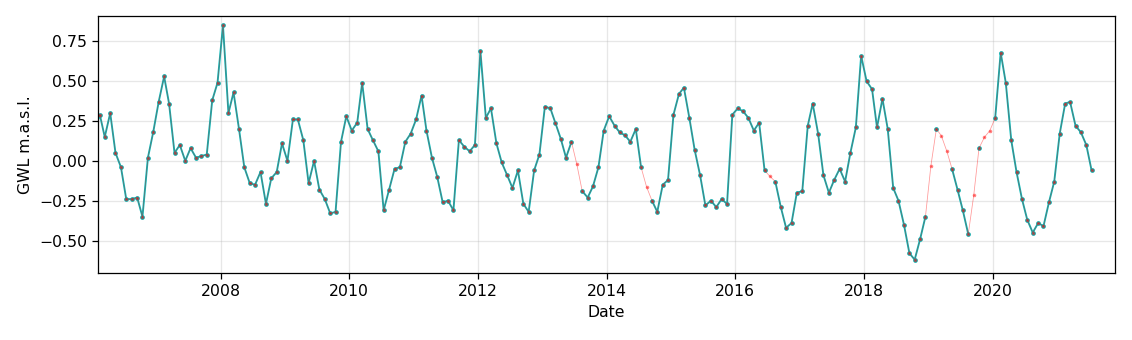

In [194]:
#When the well can't be filled with MLR then a PCHIP
dfax=gwt.loc[gwt.wellid==wellnofill[0]].data[1].GW_NN
dates=gwt.loc[gwt.wellid==wellnofill[0]].data[1].DATUM
iind=dfax.first_valid_index()
find=dfax.last_valid_index()
data=dfax.iloc[iind:find]

plt.figure(figsize=(10,3))
plt.plot(dates[iind:find],data, marker=".",markersize="4", linewidth="1.2", color="c")
plt.plot(dates[iind:find], data.interpolate(method="pchip", order=2), marker="*",
             markersize="2",linewidth="0.5", color="r", alpha=0.4)
#plt.plot(data.interpolate(method="polynomial", order=2), ls="-", lw=.5, color="green", alpha=0.5)
plt.ylabel("GWL m.a.s.l.")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [157]:
i=40
datafillw=lgwfill[i]
ind=gwt.loc[gwt.wellid==lwellid[i+3]].data.index.values[0]
datawell=gwt.loc[gwt.wellid==lwellid[i+3]].data[ind]
col=datafillw.columns[-1]

In [158]:
print(datawell.MEST_ID[0])
print(col)

9700025
twell_9700025


<IPython.core.display.Javascript object>


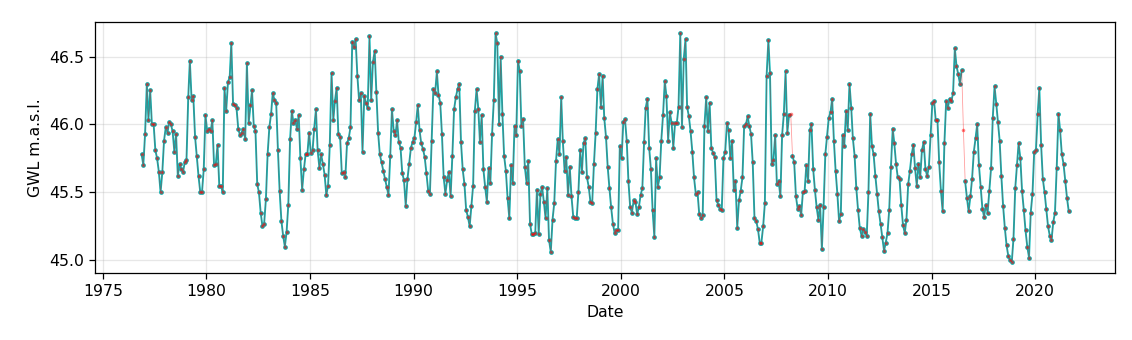

In [164]:
##PLOT TIME SERIES 
plt.figure(figsize=(10,3))
plt.plot(datawell["DATUM"],datawell["GW_NN"],marker=".",markersize="4", linewidth="1.2", color="c")
plt.plot(datafillw["DATUM"], datafillw[col], marker="*",
             markersize="2",linewidth="0.5", color="r", alpha=0.4)
plt.ylabel("GWL m.a.s.l.")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.tight_layout()